<a href="https://colab.research.google.com/github/bamyers2/tantiger/blob/main/01Summer2021Finalv1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.metrics import classification_report
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from keras.layers import LeakyReLU
from keras.optimizers import Adam
import cv2
import keras
from keras.utils import np_utils
from keras.utils.np_utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random

Using TensorFlow backend.


In [3]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [4]:
age_data = pd.read_csv('gdrive/My Drive/age_gender.csv')

In [5]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...


In [6]:
def label_age (row):
    if row['age'] > 0 and row['age'] < 3:
        return 0
    elif row['age'] > 2 and row['age'] < 10:
        return 1
    elif row['age'] > 9 and row['age'] < 21:
        return 2
    elif row['age'] > 20 and row['age'] < 26:
        return 3
    elif row['age'] > 25 and row['age'] < 28:
        return 4
    elif row['age'] > 27 and row['age'] < 32:
        return 5
    elif row['age'] > 31 and row['age'] < 37:
        return 6
    elif row['age'] > 36 and row['age'] < 46:
        return 7
    elif row['age'] > 45 and row['age'] < 55:
        return 8
    elif row['age'] > 54 and row['age'] < 66:
        return 9
    else:
        return 10

In [7]:
age_data['AgeGroup'] = age_data.apply (lambda row: label_age(row), axis=1)

In [8]:
age_data.head(3)

,age,ethnicity,gender,img_name,pixels,AgeGroup
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0


In [9]:
X = []
y = []
for index, row in age_data.iterrows():
    k = row['pixels'].split(" ")
    X.append(np.array(k))
    y.append(row['AgeGroup'])
        
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size=0.8/0.9, random_state=42)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)
X_test = np.array(X_test)
y_test = np.array(y_test)

X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [11]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [12]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [13]:
model.fit(X_train1, y_train1, batch_size=32, epochs=20, verbose=1, validation_data=(X_valid1, y_valid1))


Train on 18963 samples, validate on 2371 samples
Epoch 1/20
18963/18963 [==============================] - 47s 2ms/step - loss: 2.3679 - accuracy: 0.1149 - val_loss: 2.3161 - val_accuracy: 0.1274
Epoch 2/20
18963/18963 [==============================] - 44s 2ms/step - loss: 2.2273 - accuracy: 0.1731 - val_loss: 2.0533 - val_accuracy: 0.2210
Epoch 3/20
18963/18963 [==============================] - 44s 2ms/step - loss: 1.9841 - accuracy: 0.2417 - val_loss: 1.8839 - val_accuracy: 0.2763
Epoch 4/20
18963/18963 [==============================] - 43s 2ms/step - loss: 1.8221 - accuracy: 0.2968 - val_loss: 1.8734 - val_accuracy: 0.2893
Epoch 5/20
18963/18963 [==============================] - 44s 2ms/step - loss: 1.7161 - accuracy: 0.3228 - val_loss: 1.7043 - val_accuracy: 0.3302
Epoch 6/20
18963/18963 [==============================] - 44s 2ms/step - loss: 1.6320 - accuracy: 0.3518 - val_loss: 1.6073 - val_accuracy: 0.3615
Epoch 7/20
18963/18963 [==============================] - 44s 2ms/st

In [14]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

              precision    recall  f1-score   support

         1-2       0.88      0.89      0.89       143
         3-9       0.67      0.58      0.62       139
       10-20       0.44      0.46      0.45       179
       21-25       0.38      0.26      0.31       268
       26-27       0.27      0.08      0.12       279
       28-31       0.21      0.21      0.21       257
       32-36       0.18      0.29      0.23       242
       37-45       0.21      0.19      0.20       262
       46-54       0.26      0.38      0.31       223
       55-65       0.36      0.51      0.42       206
      66-116       0.66      0.64      0.65       173

    accuracy                           0.36      2371
   macro avg       0.41      0.41      0.40      2371
weighted avg       0.37      0.36      0.35      2371



In [15]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

[[127  13   0   0   1   0   0   0   0   1   1]
 [ 17  81  29   4   0   2   1   2   0   3   0]
 [  0  22  83  26   2  14  15   8   3   5   1]
 [  0   2  30  70  29  55  55  14  10   3   0]
 [  0   0  21  35  22  70  86  20  15   7   3]
 [  0   0  13  29  14  53  86  34  26   2   0]
 [  0   1   5  14   6  40  71  61  36   8   0]
 [  0   1   6   8   6   8  51  49  90  40   3]
 [  0   1   2   0   2   5  19  26  84  72  12]
 [  0   0   0   0   0   1   1  14  48 106  36]
 [  0   0   0   0   0   0   1   6   5  51 110]]


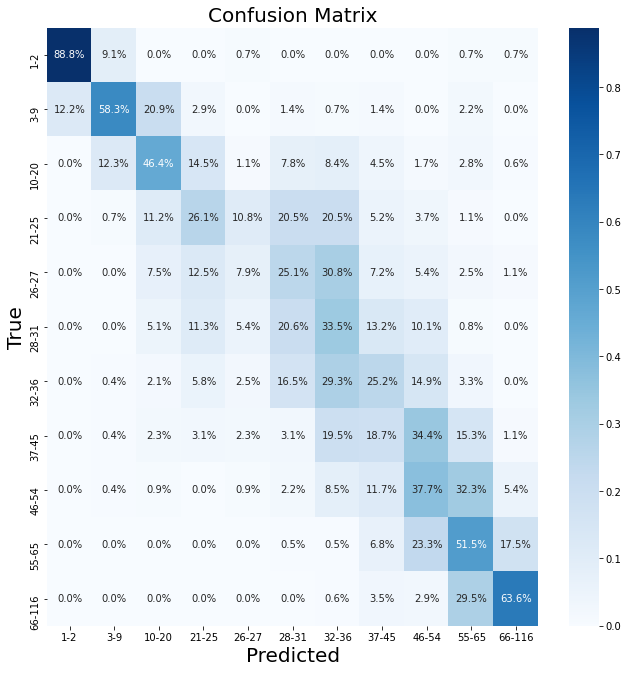

In [16]:
fig,ax= plt.subplots(figsize=(11,11))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [17]:
pred = model.predict(X_test1)
pred1 = np.where(pred==1)
TP_Indexes = []
for k in pred1[0]:
    if(y_test1[k][0] == 1):
        TP_Indexes.append(k)
X_test1_TP = X_test1[TP_Indexes]

In [18]:
aa = pd.DataFrame(y_pred1)
# aa2 = pd.DataFrame(pred1)
# aa3 = pd.DataFrame(TP_Indexes)
# aa4 = pd.DataFrame(X_test1_TP)

In [19]:
aa.head()

,0
0,3
1,0
2,9
3,7
4,4


In [20]:
aaFinal = pd.DataFrame(y_test1)

In [21]:
aaFinal[0].values[1]

0.0

In [22]:
aaFinal['aa'] = aa[0]

In [23]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [24]:
def label_age (row):
    if row[row['aa']] == 1.0:
        return 1
    else:
        return 0

In [25]:
aaFinal['YorN'] = aaFinal.apply (lambda row: label_age(row), axis=1)

In [26]:
aaFinal.head()

,0,1,2,3,4,5,6,7,8,9,10,aa,YorN
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3,0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,9,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,1
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0


In [27]:
aaFinal.shape[0]

2371

In [28]:
X_test22 = X_test.tolist()

In [29]:
con = 0
for i in range(aaFinal.shape[0]-1):
    if aaFinal['YorN'].values[i] == 0:
        X_test22.remove(X_test22[i-con])
        con += 1

In [30]:
X_test22 = np.array(X_test22)

In [31]:
X_test22[0]

array(['114', '120', '137', ..., '2', '5', '7'], dtype='<U3')

In [32]:
X_test[2]

array(['114', '120', '137', ..., '2', '5', '7'], dtype='<U3')

In [33]:
X_test22 = X_test22.tolist()

In [34]:
X_test23 = X_test22

In [35]:
len(X_test22)

856

In [36]:
div = int(round(len(X_test22) * .1, 0))

In [37]:
div

86

In [38]:
val = random.sample(X_test22, div)

In [39]:
train0 = []

for i in X_test22:
    if i not in val:
        train0.append(i)

In [40]:
val0 = []

for i in X_test22:
    if i in val:
        val0.append(i)

In [41]:
len(train0)/len(val0)

8.953488372093023

In [42]:
y_test22 = y_test.tolist()

In [43]:
y_train0 = []
y_val0 = []

for i in val0:
    y_val0.append(y_test22[X_test23.index(i)])

for i in train0:
    y_train0.append(y_test22[X_test23.index(i)])

In [44]:
len(y_train0)/len(y_val0)

8.953488372093023

In [45]:
train0 = pd.DataFrame(train0)
val0 = pd.DataFrame(val0)
y_train0 = pd.DataFrame(y_train0)
y_val0 = pd.DataFrame(y_val0)

In [46]:
train0.to_csv('train0.csv', index=False)
val0.to_csv('val0.csv', index=False)
y_train0.to_csv('y_train0.csv', index=False)
y_val0.to_csv('y_val0.csv', index=False)

In [47]:
X_test = X_train.tolist()
y_test = y_train.tolist()

test0 = pd.DataFrame(X_test)
y_test0 = pd.DataFrame(y_test)

In [48]:
test0.to_csv('test0.csv', index=False)
y_val0.to_csv('y_val0.csv', index=False)
y_test0.to_csv('y_test0.csv', index=False)

In [49]:
len(X_test)/len(y_test)
#should be 1

1.0

In [50]:
this is an error

SyntaxError: ignored

In [ ]:
X_train = np.array(train0)
y_train = np.array(y_train0)
X_valid = np.array(val0)
y_valid = np.array(y_val0)
X_test = np.array(X_train)
y_test = np.array(y_train)

X_train1 = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_valid1 = X_valid.reshape(X_valid.shape[0], 48, 48, 1)
X_test1 = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train1 = np_utils.to_categorical(y_train, num_classes = 11)
y_valid1 = np_utils.to_categorical(y_valid, num_classes = 11)
y_test1 = np_utils.to_categorical(y_test, num_classes = 11)

In [ ]:
model = Sequential()
model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(128, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(256, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(ZeroPadding2D((1,1)))
model.add(Convolution2D(512, (3, 3), activation="relu"))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

In [ ]:
model.compile(optimizer= 'sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train1, y_train1, batch_size=2, epochs=30, verbose=1, validation_data=(X_valid1, y_valid1))

In [ ]:
Y_test1 = np.argmax(y_test1, axis=1)
y_pred1 = model.predict_classes(X_test1)
target_names = ['1-2', '3-9', '10-20', '21-25', '26-27', '28-31', '32-36', '37-45', '46-54', '55-65', '66-116']
print(classification_report(Y_test1, y_pred1, target_names = target_names))

In [ ]:
cm = confusion_matrix(y_test1.argmax(axis=1), y_pred1)
print(cm)

In [ ]:
fig,ax= plt.subplots(figsize=(12,12))
sns.heatmap(cm / (cm.astype(np.float).sum(axis=1, keepdims=True)), annot=True, fmt='.1%', cmap='Blues')
#sns.heatmap(cm, annot=True, fmt='.0f',cmap='Blues')
ax.set_xlabel('Predicted', size=20);
ax.set_ylabel('True', size=20);
ax.set_title('Confusion Matrix', size=20);
ax.xaxis.set_ticklabels(target_names, size=10); \
ax.yaxis.set_ticklabels(target_names, size=10);

In [ ]:
#con = 0
#for i in range(aaFinal.shape[0]-1):
#    if aaFinal['YorN'].values[i] == 0:
#        X_test = np.delete(X_test, i-con)
#        con += 1